<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_August_2020/blob/master/05_ANN_build_PSD_ago_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import zipfile
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import sklearn
import matplotlib.pyplot as plt



In [56]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

In [57]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [58]:
# 03_ANN_NEW_DATA... only the grains in 882 are used for training 
#                    the ANN and segmented images are used to 
#                    train no-grain

# 03_ANN_NEW_DATA... only the grains in 882 are used for training the ANN and segmented images are used to train no-grain

In [59]:
!git clone https://github.com/ucfilho/marquesgabi_Julho_2020_using
%cd marquesgabi_Julho_2020_using
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'marquesgabi_Julho_2020_using'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.
/content/marquesgabi_Julho_2020_using/marquesgabi_August_2020/marquesgabi_Julho_2020_using


In [60]:
# First step: get the segmented file (photos stored in csv file)

# First step: get the segmented file (photos stored in csv file)

In [61]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [62]:
Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

y_valor=df['Type']

In [63]:
print(df)

     Unnamed: 0 Type          0  ...        782        783  Width
0             0    G    0.00000  ...    0.68631    0.68769    NaN
1             1    G    0.00000  ...    0.49262    0.50909    NaN
2             2    G    0.45321  ...    0.54919    0.55439    NaN
3             3    G    0.75367  ...    0.48524    0.61876    NaN
4             4    G    0.94521  ...    0.98108    0.95838    NaN
..          ...  ...        ...  ...        ...        ...    ...
976           7    B   84.33883  ...    7.14600    7.38484  142.0
977           8    I  104.73698  ...    2.05457    0.38150  163.0
978           9    I   75.70248  ...  107.38844  106.00001  154.0
979          10    I   56.64465  ...    3.15316    0.40107  187.0
980          11    B  111.50165  ...    0.00000    0.00000  194.0

[981 rows x 787 columns]


In [64]:
print(df.head())

   Unnamed: 0 Type        0        1  ...      781      782      783  Width
0           0    G  0.00000  0.00000  ...  0.68642  0.68631  0.68769    NaN
1           1    G  0.00000  0.00000  ...  0.47277  0.49262  0.50909    NaN
2           2    G  0.45321  0.52257  ...  0.54645  0.54919  0.55439    NaN
3           3    G  0.75367  0.64590  ...  0.43356  0.48524  0.61876    NaN
4           4    G  0.94521  0.89736  ...  0.98942  0.98108  0.95838    NaN

[5 rows x 787 columns]


In [65]:
print(df)

     Unnamed: 0 Type          0  ...        782        783  Width
0             0    G    0.00000  ...    0.68631    0.68769    NaN
1             1    G    0.00000  ...    0.49262    0.50909    NaN
2             2    G    0.45321  ...    0.54919    0.55439    NaN
3             3    G    0.75367  ...    0.48524    0.61876    NaN
4             4    G    0.94521  ...    0.98108    0.95838    NaN
..          ...  ...        ...  ...        ...        ...    ...
976           7    B   84.33883  ...    7.14600    7.38484  142.0
977           8    I  104.73698  ...    2.05457    0.38150  163.0
978           9    I   75.70248  ...  107.38844  106.00001  154.0
979          10    I   56.64465  ...    3.15316    0.40107  187.0
980          11    B  111.50165  ...    0.00000    0.00000  194.0

[981 rows x 787 columns]


In [66]:
df_teste=pd.read_csv(labels[2])
print(df_teste.head())

   Unnamed: 0  Width Type          0  ...       780       781        782        783
0           0    157    I   71.90012  ...  49.57118  35.95513    7.75954    1.03862
1           1    124    I  127.06763  ...  94.57544  98.71695  100.52861  100.84391
2           2    182    G   87.10651  ...   5.33136   5.84024    5.89941    5.65089
3           3    101    I   99.01176  ...  35.15087  41.39006   43.76875   44.09146
4           4    183    I   56.30844  ...  52.96656  53.65711   53.44656   53.11703

[5 rows x 787 columns]


In [67]:
print(df.tail())

     Unnamed: 0 Type          0  ...        782        783  Width
976           7    B   84.33883  ...    7.14600    7.38484  142.0
977           8    I  104.73698  ...    2.05457    0.38150  163.0
978           9    I   75.70248  ...  107.38844  106.00001  154.0
979          10    I   56.64465  ...    3.15316    0.40107  187.0
980          11    B  111.50165  ...    0.00000    0.00000  194.0

[5 rows x 787 columns]


In [68]:
Fotos=df.drop(['Unnamed: 0','Type','Width'], axis=1)

In [69]:
df=df.drop(['Unnamed: 0','Type','Width'], axis=1)

In [70]:
print(df.describe())

                0           1           2  ...         781         782         783
count  981.000000  981.000000  981.000000  ...  981.000000  981.000000  981.000000
mean     7.834253    7.847765    7.784539  ...    5.294938    5.215285    5.291887
std     23.507544   23.434137   23.360003  ...   18.945649   19.327633   19.863527
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.311510    0.309190    0.313200  ...    0.332510    0.336190    0.329620
50%      0.499150    0.490170    0.490990  ...    0.483030    0.479810    0.489680
75%      0.640190    0.644030    0.652580  ...    0.639650    0.640320    0.637210
max    127.067630  126.206040  120.224750  ...  108.437500  114.958580  121.952670

[8 rows x 784 columns]


In [71]:
print(np.array(Fotos).shape )

(981, 784)


# Second step: create the ann to evaluate which is a grain in photos segmented


In [72]:
# only crop photos teach what is grain....

In [73]:
images28=np.array(df)

In [74]:
#print(y_valor)

In [75]:
y_new=[]
Grain=0
Others=0
Cont=-1
Others_Local=[]
Grain_Local=[]
for x in y_valor:
  Cont=Cont+1
  if re.search('G', x):
    y_new.append(1)
    Grain=Grain+1
    Grain_Local.append(Cont)
  else:
    y_new.append(2)
    Others=Others+1
    Others_Local.append(Cont)

In [76]:
print('Graos=',Grain)
print('Others=',Others)
print('Others local',Others_Local)
print('Grain local',Grain_Local)

sampled_list = random.sample(Others_Local,Grain)

Graos= 245
Others= 736
Others local [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 26

In [77]:
print('Graos=',Grain)
print('Others=',Others)
print('Others local',Others_Local)
sampled_list = random.sample(Others_Local,Grain)


Graos= 245
Others= 736
Others local [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 26

In [78]:
print('Graos=',Grain)
print('Others=',Others)
print('Others local',Others_Local)
print('Grain local',Grain_Local)


Graos= 245
Others= 736
Others local [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 26

In [79]:
x_new=[]
y_rede=[]
for i in range(Grain):
  x_new.append(Fotos.iloc[Grain_Local[i]])
  x_new.append(Fotos.iloc[sampled_list[i]])
  y_rede.append(y_new[Grain_Local[i]])
  y_rede.append(y_new[sampled_list[i]])


In [80]:
np.array(x_new).shape

(490, 784)

In [81]:
#pd.DataFrame(y_rede).describe()

In [82]:
# y_valor=np.copy(y_new)
y_total=np.copy(y_rede)

In [83]:
#Define data train and data test
#images28=Fotos
images28=x_new #Fotos
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_total), 
                                                    test_size=0.30, shuffle=True, 
                                                    random_state=42)

In [84]:
print(len(y_total))
print(len(yw_test))
print(len(yw_train))
A=490*0.3
print(A)

490
147
343
147.0


In [85]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta esperada para o treino
test_images=W_test
test_labels=yw_test

In [86]:
#print(len(test_labels))

In [87]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [88]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [89]:
# GRAIN use crop photos other cases segmented
model.fit(train_images, train_labels, epochs=200) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 1.8172 - accuracy: 0.4840
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1780 - accuracy: 0.5160
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8234 - accuracy: 0.5889
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5338 - accuracy: 0.5394
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.8007 - accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3727 - accuracy: 0.5394
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.7055
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.6676
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.6851
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2616 - accuracy: 0.5160
Epoch 11/

In [90]:
#ANN das imagens
x=np.array(W_test)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [91]:
print(x)

[[0.62516 0.67814 0.7257  ... 0.34312 0.32268 0.31357]
 [0.52206 0.51394 0.51079 ... 0.75293 0.64692 0.61091]
 [0.15494 0.1429  0.13764 ... 0.15702 0.08283 0.09974]
 ...
 [0.52603 0.53779 0.53432 ... 0.53609 0.53072 0.53078]
 [0.5801  0.59905 0.64345 ... 0.44491 0.43344 0.44076]
 [0.40111 0.44803 0.4296  ... 0.44068 0.42142 0.33336]]


In [92]:
y_valor=np.copy(yw_test)
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print (df)

In [93]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   1   2
Actual           
1          69   8
2          21  49


In [94]:
y_true = df['y_Actual']
y_pred = df['y_Predicted']
print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83        77
           2       0.86      0.70      0.77        70

    accuracy                           0.80       147
   macro avg       0.81      0.80      0.80       147
weighted avg       0.81      0.80      0.80       147



In [95]:
#

# Third step: testing ANN other segmented images

In [96]:
!git clone https://github.com/ucfilho/marquesgabi_August_2020
%cd marquesgabi_August_2020

Cloning into 'marquesgabi_August_2020'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/marquesgabi_Julho_2020_using/marquesgabi_August_2020/marquesgabi_Julho_2020_using/marquesgabi_August_2020


In [97]:
Transfere='img28_all00.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [98]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [99]:
df=pd.read_csv(labels[0])
print(df.shape)

(150, 787)


In [100]:
df=pd.read_csv(labels[0])
Width_All=df['Width']
df=df.drop(['Unnamed: 0','Type','Width'], axis=1)
print(df.head())

          0         1         2  ...        781       782       783
0  61.14508  60.20605  63.89233  ...   87.26298  86.56084  70.53898
1  54.96550  56.12730  56.46103  ...    6.09697   6.10529   6.17609
2  81.32749  86.75936  93.59119  ...  104.26302  98.95892  98.95303
3   0.39589   0.51145   0.68329  ...   60.38241  58.77369  57.35922
4  48.26560  49.34269  51.20098  ...   86.94305  86.16422  92.14825

[5 rows x 784 columns]


# Fourth step test ANN for data to be used for PSD (Particle size distribution) determination

In [101]:
#ANN das imagens
x=np.array(df)
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [102]:
y=np.array(prediction)
Num=len(y)
print(Num)

150


In [103]:
print(y)

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2
 2 2]


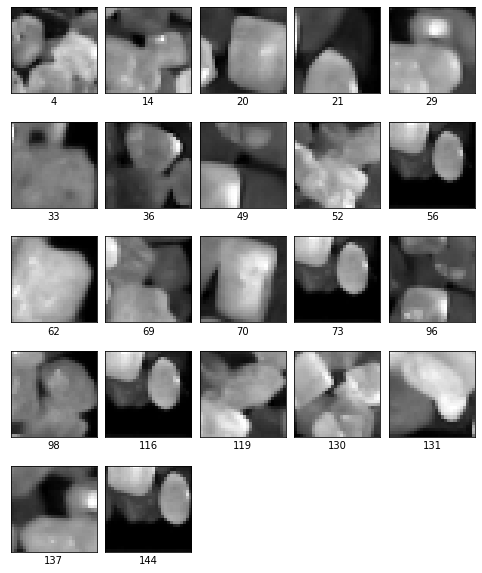

In [104]:
# select just the grains to show picture
grain=[]
img28_all=pd.DataFrame(x)
Width_Grain_2=[]

for i in range(Num):
  if(y[i]==1):
    grain.append(i)
    Width_Grain_2.append(Width_All[i])

cont=0 # 
cols=5
rows=int(len(grain)/cols)+1

for i in range(Num):
  if(y[i]==1):
    
    cont=cont+1
    plt.subplot(rows,cols,cont) # subplot not allow cont=0
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    Foto=np.array(img28_all.iloc[i]).reshape(28,28)
    plt.imshow(Foto, cmap = "gray")
    plt.xlabel(i)

plt.subplots_adjust(bottom=0.1, right=1.2, top=2,hspace=0.3, wspace=0.1)

In [105]:
print(Width_Grain_2)

[199, 189, 141, 111, 137, 116, 175, 110, 196, 200, 119, 185, 114, 194, 193, 194, 194, 170, 170, 111, 126, 196]


In [106]:
Width_Grain=Width_All.iloc[grain]

In [107]:
Width_Grain=np.array(Width_Grain) # passando de Serie (dataframe 1d) para np.array
print(Width_Grain) 


[199 189 141 111 137 116 175 110 196 200 119 185 114 194 193 194 194 170
 170 111 126 196]


In [108]:
print(Width_Grain_2) # lista : tem virgula entre os elementos

[199, 189, 141, 111, 137, 116, 175, 110, 196, 200, 119, 185, 114, 194, 193, 194, 194, 170, 170, 111, 126, 196]


# Fifth step create classes

In [112]:
Width_bounds=[100,200]
N_Class=4
Class=[]
a=Width_bounds[0]
b=Width_bounds[1]
delta_ab=(b-a)/N_Class
for i in range(N_Class-1):
  valor=a+delta_ab*(i+1)
  Class.append(valor)

print(Class)

[120.0, 140.0, 160.0, 180.0]


In [122]:
Num=len(Width_Grain)
count=[0,0,0,0]
Hist_Width=[]
for i in range(Num):
  if(Width_Grain[i]<Class[0]):
    count[0]=count[0]+1
    Hist_Width.append(0)
  elif(Width_Grain[i]<Class[1]):
    count[1]=count[1]+1
    Hist_Width.append(1)
  elif(Width_Grain[i]<Class[2]):
    count[2]=count[2]+1
    Hist_Width.append(2)
  else:
    count[3]=count[3]+1
    Hist_Width.append(3)

print(count)

[6, 2, 1, 13]


(array([ 6.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0., 13.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

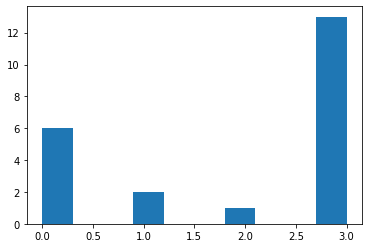

In [124]:
plt.hist(Hist_Width)